In [1]:
import pandas as pd
import numpy as np
import savReaderWriter as spss

In [3]:
raw_data = spss.SavReader('/home/aastroza/Dropbox/lectura/data/BaseMaestraECL2014.sav', returnHeader = True) # This is fast
raw_data_list = list(raw_data) # this is slow
data = pd.DataFrame(raw_data_list) # this is slow
data = data.rename(columns=data.loc[0]).iloc[1:] # setting columnheaders, this is slow too.

In [4]:
data.columns

Index([u'FOLIO_ENCUESTA', u'FOLIO_MANZANA', u'FEXP', u'VARSTRAT', u'VARUNIT', u'FORMA_CUESTIONARIO', u'H_INICIO', u'DURACION', u'Region', u'Macrozona', u'Comuna_CODIGO', u'Sexo_Encuestado', u'Edad_Encuestado', u'P0', u'B1A', u'B2', u'B1B', u'B3', u'C1', u'C2', u'D1', u'D2', u'E1A', u'E2', u'E1B', u'E3', u'F1A', u'F2', u'F1B', u'F3', u'c.A1A', u'c.A1B', u'c.A1C', u'c.A1_OTRA', u'c.A1A_2', u'c.A1B_2', u'c.A1C_2', u'c.A1A_OTRO', u'c.A1B_OTRO', u'c.A1C_OTRO', u'c.A1_OTRA2', u'A2', u'A3', u'c.A4', u'A5', u'a.A6', u'a.A7A', u'a.A7B', u'a.A7C', u'A8', u'A9A', u'A9B', u'A10A1', u'A10A2', u'A10A3', u'A10A4', u'A10B1', u'A10B2', u'A10B3', u'A10B4', u'A11A', u'A11B', u'a.A12A', u'a.A12B', u'a.A12C', u'a.A12D', u'a.A13A', u'a.A13B', u'a.A13C', u'a.A13D', u'a.A14A', u'a.A14B', u'a.A14C', u'A15', u'A16A', u'A16B', u'A16C', u'A16D', u'A16E', u'A16F', u'A17A', u'A17B', u'a.A17C', u'A17D', u'A17E', u'B4A1', u'B4A2', u'B4A3', u'B4A4', u'B4B1', u'B4B2', u'B4B3', u'B4B4', u'B5A', u'B5B', u'a.B6', u'B7A', 

In [5]:
ecl = data[(data['Region'] == 13) &(data['Comuna_CODIGO'] < 13402)]
ecl['Comuna_CODIGO']

5098    13101
5099    13101
5100    13101
5101    13101
5102    13101
5103    13101
5104    13101
5105    13101
5106    13101
5107    13101
5108    13101
5109    13101
5110    13101
5111    13101
5112    13101
...
6206    13401
6207    13401
6208    13401
6209    13401
6210    13401
6211    13401
6212    13401
6213    13401
6214    13401
6215    13401
6216    13401
6217    13401
6218    13401
6219    13401
6220    13401
Name: Comuna_CODIGO, Length: 1123, dtype: object

In [6]:
name_map = dict(zip([13101, 13102, 13103
,13104,13105,13106,13107,13108,13109,13110,13111,13112,13113,13114,13115,13116,13117,13118,13119,13120,13121,13122,13123
,13124,13125,13126,13127,13128,13129,13130,13131,13132,13201,13202,13203,13301,13302,13303,13401],
map(lambda x: x.upper(), [u'Santiago',
u'Cerrillos',
u'Cerro Navia',
u'Conchali',
u'El Bosque',
u'Estacion Central',
u'Huechuraba',
u'Independencia',
u'La Cisterna',
u'La Florida',
u'La Granja',
u'La Pintana',
u'La Reina',
u'Las Condes',
u'Lo Barnechea',
u'Lo Espejo',
u'Lo Prado',
u'Macul',
u'Maipu',
u'nunoa',
u'Pedro Aguirre Cerda',
u'Penalolen',
u'Providencia',
u'Pudahuel',
u'Quilicura',
u'Quinta Normal',
u'Recoleta',
u'Renca',
u'San Joaquin',
u'San Miguel',
u'San Ramon',
u'Vitacura',
u'Puente Alto',
u'Pirque',
u'San Jose de Maipo',
u'Colina',
u'Lampa',
u'Tiltil',
u'San Bernardo'])))

name_map

{13101: u'SANTIAGO',
 13102: u'CERRILLOS',
 13103: u'CERRO NAVIA',
 13104: u'CONCHALI',
 13105: u'EL BOSQUE',
 13106: u'ESTACION CENTRAL',
 13107: u'HUECHURABA',
 13108: u'INDEPENDENCIA',
 13109: u'LA CISTERNA',
 13110: u'LA FLORIDA',
 13111: u'LA GRANJA',
 13112: u'LA PINTANA',
 13113: u'LA REINA',
 13114: u'LAS CONDES',
 13115: u'LO BARNECHEA',
 13116: u'LO ESPEJO',
 13117: u'LO PRADO',
 13118: u'MACUL',
 13119: u'MAIPU',
 13120: u'NUNOA',
 13121: u'PEDRO AGUIRRE CERDA',
 13122: u'PENALOLEN',
 13123: u'PROVIDENCIA',
 13124: u'PUDAHUEL',
 13125: u'QUILICURA',
 13126: u'QUINTA NORMAL',
 13127: u'RECOLETA',
 13128: u'RENCA',
 13129: u'SAN JOAQUIN',
 13130: u'SAN MIGUEL',
 13131: u'SAN RAMON',
 13132: u'VITACURA',
 13201: u'PUENTE ALTO',
 13202: u'PIRQUE',
 13203: u'SAN JOSE DE MAIPO',
 13301: u'COLINA',
 13302: u'LAMPA',
 13303: u'TILTIL',
 13401: u'SAN BERNARDO'}

# Agrupando por Comuna

In [15]:
variables = ('comuna', 'FEXP', 'sexo', 'edad', 'A9B', 'a.J6', 'J1D', 'O2', 'a.A6', 'b.M26B')

In [9]:
from collections import defaultdict
from itertools import repeat, chain

values = defaultdict(list)

for id_comuna, df_comuna in ecl.groupby('Comuna_CODIGO'):
    values['comuna'].append(name_map[id_comuna])
    
    for k, v in df_comuna.ix[:,variables].iteritems():
        if k == 'comuna':
            continue
        if k == 'edad':
            v =  df_comuna['FEXP'].sum()
            k = 'poblacion'
        if k == 'FEXP':
            continue     
        if k == 'sexo':
            continue  
        if k == 'A9B':#¿Cuando usted lee lo hace por gusto/ocio?
            voluntad = [0, 0, 0, 0]
            for i, df_voluntad in df_comuna.groupby('A9B'):
                if i == 1:
                    voluntad[0] = df_voluntad['FEXP'].sum()
                if i == 2:
                    voluntad[1] = df_voluntad['FEXP'].sum()
                if i == 88:
                    voluntad[2] = df_voluntad['FEXP'].sum()
                if i == 99:
                    voluntad[3] = df_voluntad['FEXP'].sum()
            v = voluntad[0]/(voluntad[0] + voluntad[1] + voluntad[2] + voluntad[3])
            k = 'voluntad' 
        if k == 'a.J6':#¿Es socio de alguna biblioteca?
            socio = [0, 0, 0, 0]
            for i, df_socio in df_comuna.groupby('a.J6'):
                if i == 1:
                    socio[0] = df_socio['FEXP'].sum()
                if i == 2:
                    socio[1] = df_socio['FEXP'].sum()
                if i == 88:
                    socio[2] = df_socio['FEXP'].sum()
                if i == 99:
                    socio[3] = df_socio['FEXP'].sum()
            v = socio[0]/(socio[0] + socio[1] + socio[2] + socio[3])
            k = 'socio' 
        if k == 'J1D':#¿Lee en el transporte publico?
            transporte = [0, 0, 0, 0]
            for i, df_transporte in df_comuna.groupby('J1D'):
                if i == 1:
                    transporte[0] = df_transporte['FEXP'].sum()
                if i == 2:
                    transporte[1] = df_transporte['FEXP'].sum()
                if i == 88:
                    transporte[2] = df_transporte['FEXP'].sum()
                if i == 99:
                    transporte[3] = df_transporte['FEXP'].sum()
            v = transporte[0]/(transporte[0] + transporte[1] + transporte[2] + transporte[3])
            k = 'transporte'
        if k == 'a.A6':#¿Cuantos libros hay en su hogar?
            libros = [0, 0, 0, 0, 0, 0, 0, 0]
            for i, df_libros in df_comuna.groupby('a.A6'):
                if i == 1:
                    libros[0] = df_libros['FEXP'].sum()*3
                if i == 2:
                    libros[1] = df_libros['FEXP'].sum()*8
                if i == 3:
                    libros[2] = df_libros['FEXP'].sum()*18
                if i == 4:
                    libros[3] = df_libros['FEXP'].sum()*38
                if i == 5:
                    libros[0] = df_libros['FEXP'].sum()*75
                if i == 6:
                    libros[1] = df_libros['FEXP'].sum()*150
                if i == 7:
                    libros[2] = df_libros['FEXP'].sum()*350
                if i == 8:
                    libros[3] = df_libros['FEXP'].sum()*500
            v = sum(libros)
            k = 'nlibrosA'
        if k == 'b.M26B':#¿Cuantos libros hay en su hogar?
            libros = [0, 0, 0, 0, 0, 0, 0, 0]
            for i, df_libros in df_comuna.groupby('b.M26B'):
                if i == 1:
                    libros[0] = df_libros['FEXP'].sum()*3
                if i == 2:
                    libros[1] = df_libros['FEXP'].sum()*8
                if i == 3:
                    libros[2] = df_libros['FEXP'].sum()*18
                if i == 4:
                    libros[3] = df_libros['FEXP'].sum()*38
                if i == 5:
                    libros[0] = df_libros['FEXP'].sum()*75
                if i == 6:
                    libros[1] = df_libros['FEXP'].sum()*150
                if i == 7:
                    libros[2] = df_libros['FEXP'].sum()*350
                if i == 8:
                    libros[3] = df_libros['FEXP'].sum()*500
            v = sum(libros)
            k = 'nlibrosB' 
        if k == 'O2':#¿Ingreso total liquido del hogar?
            daut_resp = df_comuna[df_comuna['O2'].isin([1,2,3,4,5,6,7,8,9,10])]['O2'].values
            daut_freq = df_comuna[df_comuna['O2'].isin([1,2,3,4,5,6,7,8,9,10])]['FEXP'].values
            daut_zip = zip(daut_resp, daut_freq.astype(int))
            daut_array = np.array(list(chain(*[repeat(p, w) for p, w in daut_zip])), dtype=np.float64)
            v = np.median(daut_array) 
            k = 'ingreso' 
        values[k].append(v)

In [20]:
df = pd.DataFrame(data=values)

In [21]:
df['librospp'] = (df['nlibrosA'] + df['nlibrosB'])/ df['poblacion']

In [22]:
df

,comuna,ingreso,nlibrosA,nlibrosB,poblacion,socio,transporte,voluntad,librospp
0,SANTIAGO,7,9985087.401733,494103.536865,191891.920105,0.230877,0.448610,0.921968,54.609860
1,CERRILLOS,6,2103756.699219,25663.117188,66199.524048,0.184130,0.417550,0.756074,32.166694
2,CERRO NAVIA,3,7256097.092529,1214717.748047,114942.519470,0.000000,0.154857,0.583331,73.696095
3,CONCHALI,5,5731588.044800,1016467.090332,162955.664917,0.086703,0.224259,0.900602,41.410375
4,EL BOSQUE,4,8196318.649170,0.000000,143431.164978,0.164348,0.228290,0.640547,57.144615
5,ESTACION CENTRAL,5,2379105.501709,728815.536621,73712.529297,0.074972,0.263586,0.675441,42.162724
6,HUECHURABA,6,2026707.934570,237709.853516,40109.980103,0.169462,0.143033,1.000000,56.455221
7,INDEPENDENCIA,6,2297595.047363,406674.645996,56998.997803,0.210725,0.496370,0.747600,47.444162
8,LA CISTERNA,5,1529138.625488,772697.375488,31691.071289,0.056302,0.288572,0.746304,72.633581
9,LA FLORIDA,6,15462583.166504,846206.917969,349099.209717,0.072431,0.517237,0.812353,46.716777


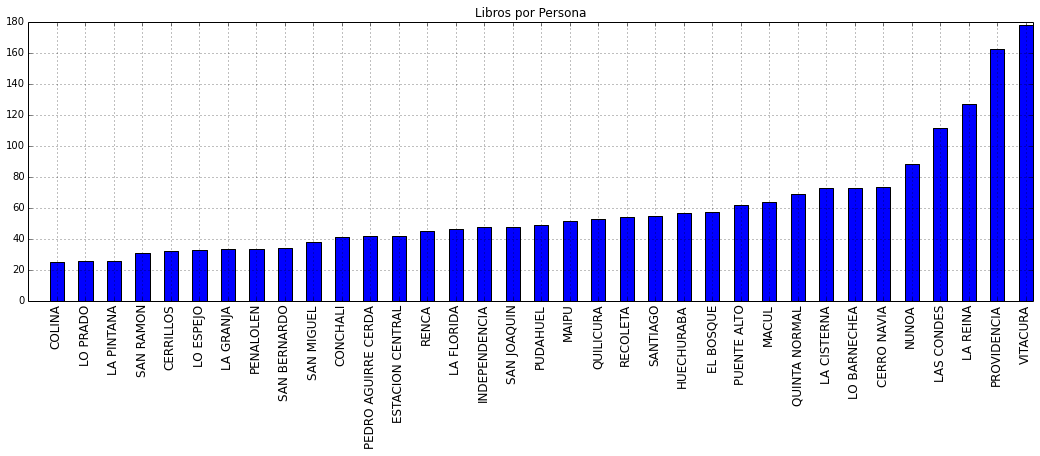

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
df2 = df.sort_index(by=['librospp', 'comuna'], ascending=[True, True])
ax = df2['librospp'].plot(kind='bar', title ="Libros por Persona",figsize=(18,5), fontsize=12)
#ax.set_xlabel("Hour",fontsize=12)
#ax.set_ylabel("V",fontsize=12)
ax.set_xticklabels(list(df2['comuna']))
plt.show()

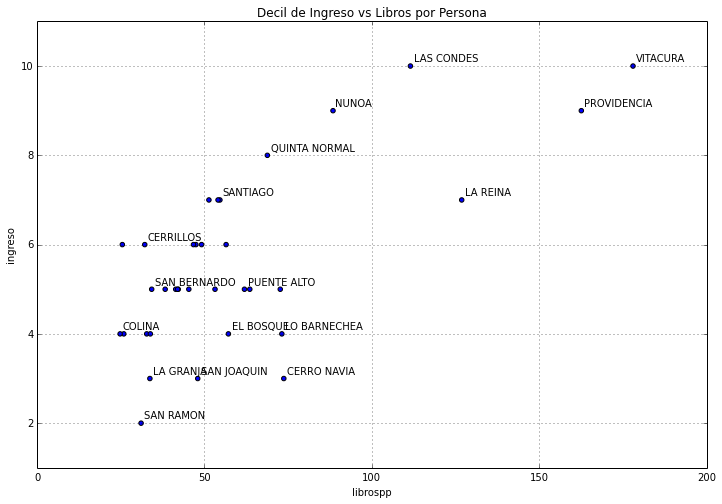

In [14]:
ax = df.plot(kind='scatter', x='librospp', y='ingreso', 
             title ="Decil de Ingreso vs Libros por Persona",figsize=(12,8), fontsize=12)
for i in [0,1,2,4,10,12,13,14,19,22,25,28,30,31,32,33,34]:
#for i in range(0,35):
    ax.text(df['librospp'][i]+1, df['ingreso'][i]+0.1, df['comuna'][i])
plt.show()

# Agrupando por Ingresos a Nivel Nacional

In [32]:
variables = ('FEXP', 'O2', 'a.A6', 'b.M26B', 'A8')

In [36]:
values = defaultdict(list)

for id_ingreso, df_ingreso in data.groupby('O2'):
    values['ingreso'].append(id_ingreso)
    
    for k, v in df_ingreso.ix[:,variables].iteritems():
        if k == 'O2':
            v =  df_ingreso['FEXP'].sum()
            k = 'poblacion'
        if k == 'FEXP':
            continue     
        if k == 'a.A6':#¿Cuantos libros hay en su hogar?
            libros = [0, 0, 0, 0, 0, 0, 0, 0]
            for i, df_libros in df_ingreso.groupby('a.A6'):
                if i == 1:
                    libros[0] = df_libros['FEXP'].sum()*3
                if i == 2:
                    libros[1] = df_libros['FEXP'].sum()*8
                if i == 3:
                    libros[2] = df_libros['FEXP'].sum()*18
                if i == 4:
                    libros[3] = df_libros['FEXP'].sum()*38
                if i == 5:
                    libros[0] = df_libros['FEXP'].sum()*75
                if i == 6:
                    libros[1] = df_libros['FEXP'].sum()*150
                if i == 7:
                    libros[2] = df_libros['FEXP'].sum()*350
                if i == 8:
                    libros[3] = df_libros['FEXP'].sum()*500
            v = sum(libros)
            k = 'nlibrosA'
        if k == 'b.M26B':#¿Cuantos libros hay en su hogar?
            libros = [0, 0, 0, 0, 0, 0, 0, 0]
            for i, df_libros in df_ingreso.groupby('b.M26B'):
                if i == 1:
                    libros[0] = df_libros['FEXP'].sum()*3
                if i == 2:
                    libros[1] = df_libros['FEXP'].sum()*8
                if i == 3:
                    libros[2] = df_libros['FEXP'].sum()*18
                if i == 4:
                    libros[3] = df_libros['FEXP'].sum()*38
                if i == 5:
                    libros[0] = df_libros['FEXP'].sum()*75
                if i == 6:
                    libros[1] = df_libros['FEXP'].sum()*150
                if i == 7:
                    libros[2] = df_libros['FEXP'].sum()*350
                if i == 8:
                    libros[3] = df_libros['FEXP'].sum()*500
            v = sum(libros)
            k = 'nlibrosB' 
        if k == 'A8':#¿Que tipo de lector se considera usted?
            daut_resp = df_ingreso[df_ingreso['A8'].isin([1,2,3,4,5])]['A8'].values
            daut_freq = df_ingreso[df_ingreso['A8'].isin([1,2,3,4,5])]['FEXP'].values
            daut_zip = zip(daut_resp, daut_freq.astype(int))
            daut_array = np.array(list(chain(*[repeat(p, w) for p, w in daut_zip])), dtype=np.float64)
            v = np.mean(daut_array) 
            k = 'lector' 
        values[k].append(v)

In [37]:
dfn = pd.DataFrame(data=values)
dfn['librospp'] = (dfn['nlibrosA'] + dfn['nlibrosB'])/ dfn['poblacion']

In [38]:
dfn

,ingreso,lector,nlibrosA,nlibrosB,poblacion,librospp
0,1,2.470641,12286413.715696,1814199.508530,932374.717512,15.123333
1,2,2.464371,10136101.095772,2432304.816040,794556.967121,15.818131
2,3,2.498639,21838820.783043,3659531.082489,1247729.224316,20.435806
3,4,2.498871,29087701.794195,2902414.886078,1192822.292380,26.818845
4,5,2.635862,40720114.485550,3785009.497009,1240604.118053,35.873752
5,6,2.802600,41820385.884666,6311206.927032,1201419.928808,40.062256
6,7,2.850824,37006247.000885,2920071.765869,916856.809927,43.546951
7,8,2.836937,56830241.459084,8015880.401039,1024712.448194,63.282262
8,9,2.989620,48821896.107292,2194988.880920,765262.524437,66.665861
9,10,3.374376,88682933.105850,4842696.384048,762524.125145,122.652683
